In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import vispy.gloo # Needs to be loaded first or everything breaks. IDK WHY!

In [1]:
import vispy

In [2]:
import vispy.app

In [3]:
import seaborn as sns

In [4]:
sns.set_context('paper', font_scale=2.2)
sns.set_style('ticks')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import LB_D2Q9.multicomponent_multiphase.multi as sc

Ok, let's figure out how to scale our system appropriately.

In [9]:
L_lb = 50 # How many lattice sites yeast radius is broken into

nx = 256
ny = 256

print 'nx', nx, 'ny', ny

nx 256 ny 256


In [10]:
num_pops=1

In [11]:
bc_halo = 3
bc_map = np.zeros((nx + 2*bc_halo, ny + 2*bc_halo, num_pops), dtype=sc.int_type)

bc_map[...] = sc.REGULAR

bc_map[0:bc_halo, :, :] = sc.NOSLIP_BC
bc_map[-bc_halo:, :, :] = sc.NOSLIP_BC
bc_map[:, 0:bc_halo, :] = sc.NOSLIP_BC
bc_map[:, -bc_halo:, :] = sc.NOSLIP_BC

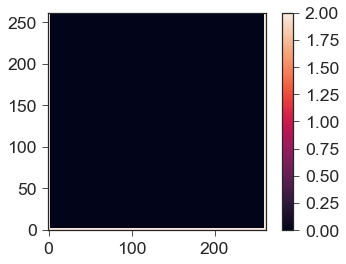

In [12]:
plt.imshow(bc_map[:, :, 0].T, origin='lower')
plt.colorbar()

In [13]:
sim = sc.Simulation_RunnerD2Q25(
    nx = nx,
    ny = ny,
    bc_map = bc_map,
    L_lb = L_lb,
    T_lb = 1.0, # Just a nonsense variable right now    
    num_populations=num_pops,
    two_d_local_size=(32,16), 
    check_max_ulb=False
)

2d global: (256, 256)
2d local: (32, 16)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 9.0.282
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1594 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024L, 1024L, 64L]
---------------------------
This context is associated with  1 devices


In [14]:
import pyopencl as cl

In [15]:
import skimage as ski
import skimage.draw

In [16]:
center_lat_x = int(nx/2)
center_lat_y = int(ny/2)

bc = 'zero_density' # For the walls...no adhesion to walls.

In [17]:
import skimage as ski
import skimage.filters

In [18]:
circ_r, circ_c = ski.draw.circle(center_lat_x, center_lat_y, L_lb)

# Figuring out the densities...

rho_gas = 0.0767
rho_fluid = 2.2408

rho1 = rho_gas*np.ones((sim.nx, sim.ny))

rho1[circ_r, circ_c] = rho_fluid # Guess of what the density should be...
rho1 = ski.filters.gaussian(rho1, sigma=3)



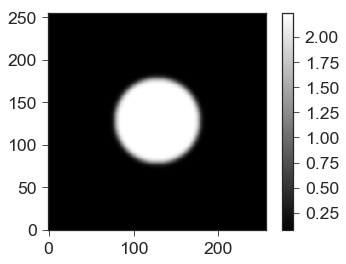

In [19]:
plt.imshow(rho1.T, origin = 'lower', cmap=plt.cm.binary_r)
plt.colorbar()

In [20]:
media1 = sc.Fluid(sim, 0, nu = .5*sim.cs**2, bc=bc)
media1.initialize(rho1, f_amp=1e-6)

tau 1.0
omega 1.0


In [21]:
sim.add_fluid(media1)

In [22]:
sim.complete_setup()

tau array: [1.]


In [23]:
sim.fluid_list

## Repulsion between yeast

In [24]:
# Complete repulsion values with a nice looking interface :) 

# P = 2.125  # For linear
# gamma = P

P = 3.
#P = 0.
gamma = -5

# P = 1.8  # For linear
# gamma = 2.3


zeta = 12./7.
G1 = 2.*(gamma + P*zeta)/(zeta - 1)
G2 = -2.*(gamma + P)/(zeta - 1)
print G1
print G2

0.4
5.6


In [25]:
# # Self-interaction! G is effectively doubled in this case.
# #sim.add_interaction_force(0, 0, -20*.5, bc=bc) #repulsive
# # sim.add_interaction_force(0, 1, G1, bc=bc, potential='linear') #repulsive
sim.add_interaction_force(0, 0, -.5*G1, bc=bc, potential='shan_chen', 
                         potential_parameters=[1.], rho_wall=rho_gas) #repulsive
sim.add_interaction_force_second_belt(0, 0, -.5*G2, bc=bc, potential='shan_chen', 
                        potential_parameters=[1.], rho_wall=rho_gas) #repulsive

# Running the simulation

In [26]:
sim.run(1)

In [27]:
import LB_D2Q9.field_visualizer as fv

In [28]:
visualizer = fv.Field_Visualizer_Canvas(sim, sim.rho[:, :, 0], num_steps_per_draw=1, max_magnitude=1.1*rho_fluid)
#visualizer = fv.Field_Visualizer_Canvas(sim, sim.u_bary, num_steps_per_draw=1, max_magnitude=.1)

INFO: Could not import backend "PyQt4":
No module named PyQt4
INFO:vispy:Could not import backend "PyQt4":
No module named PyQt4


In [29]:
import time

In [33]:
tstart = time.time()
visualizer.show()
visualizer.measure_fps()
visualizer.app.run(allow_interactive=False)
tfinish = time.time()

print 'Time Elapsed:', tfinish - tstart
print 'Time points run:', visualizer.total_num_steps
print 'Total dimensionless time run:', visualizer.total_num_steps*sim.delta_t

9.3 FPS
60.7 FPS
60.0 FPS
59.0 FPS
57.1 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
59.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
60.0 FPS
Time Elapsed: 52.6878581047
Time points run: 3775
Total dimensionless time run: 3775.0


# Adding gravitational force

In [31]:
sim.add_radial_g_force(0, center_lat_x, center_lat_y, 1e-5, 1.0)

In [32]:
#sim.add_constant_g_force(0, 0, -1e-4)

## Checking the sim

In [40]:
rho_max = sim.rho.get().max()
rho_min = sim.rho.get().min()
print rho_max, rho_min
print rho_max/rho_min

2.2328268704355834 0.07697839257112656
29.00589108005203


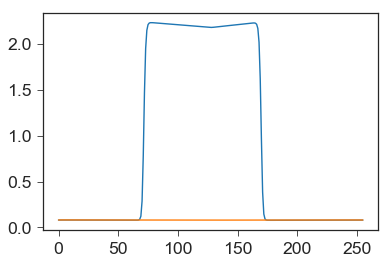

In [41]:
rho1 = sim.rho.get()[sim.nx/2, :, 0]
plt.plot(rho1)
rho1 = sim.rho.get()[0, :, 0]
plt.plot(rho1)

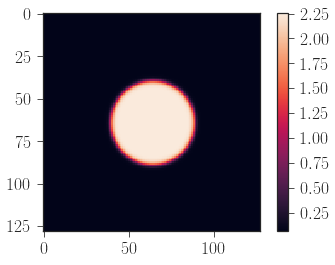

In [37]:
plt.imshow(np.sum(sim.rho.get(), axis=2))
plt.colorbar()

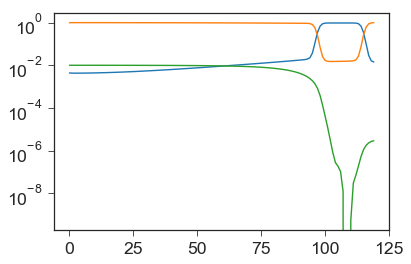

In [54]:
plt.semilogy(rho1)
plt.semilogy(rho2)
plt.semilogy(rho3)

In [90]:
sim.run(10)

In [90]:
sim.rho.get().sum()

14543.999999337568

In [91]:
np.min(sim.rho.get())

-7.753186794379539e-08

In [ ]:
plt.plot(rho1)
plt.ylim(0, .1)

In [ ]:
plt.plot(sim.rho.get()[sim.nx/2, :, 0], ls='-', marker='.')
plt.plot(sim.rho.get()[sim.nx/2, :, 1], ls='-', marker='.')

plt.hlines(1, 0, sim.ny, linestyles='--')
plt.hlines(0, 0, sim.ny, linestyles='--')

plt.figure()

plt.semilogy(sim.rho.get()[sim.nx/2, :, 1], ls='-', marker='.')
plt.hlines(1, 0, sim.ny, linestyles='--')
plt.hlines(0, 0, sim.ny, linestyles='--')


plt.figure()

rho_sum = np.sum(sim.rho.get(), axis=2)
plt.plot(rho_sum[sim.nx/2, :], ls='-', marker='.')
plt.hlines(1, 0, sim.ny, linestyles='--')
plt.hlines(0, 0, sim.ny, linestyles='--')

The only thing I really do not like here is the very weird, large diffusing tail.

In [ ]:
plt.plot(sim.Gy.get()[sim.nx/2, :, 0])

In [ ]:
sim.rho.get().sum()

In [ ]:
plt.streamplot(sim.Y, sim.X, sim.Gx.get()[:, :, 0], sim.Gy.get()[:, :, 0])

In [ ]:
plt.pcolormesh(sim.Y, sim.X, sim.Gx.get()[:, :, 0], cmap=plt.cm.binary_r)
plt.colorbar()

In [ ]:
plt.pcolormesh(sim.Y, sim.X, sim.Gy.get()[:, :, 0], cmap=plt.cm.binary_r)
plt.colorbar()

In [ ]:
np.sum(sim.rho.get())

In [ ]:
plt.imshow(sim.rho.get()[:, :, 0])
plt.colorbar()

In [ ]:
plt.imshow(sim.rho.get()[:, :, 1])
plt.colorbar()

In [ ]:
plt.imshow(np.sum(sim.rho.get(), axis=2))
plt.colorbar()

How is the sum of the densities larger than one? That's really not good, right?

In [ ]:
sim.run(1)

# Other stuff

In [ ]:
media1.update_hydro()

In [ ]:
media2.update_hydro()

In [ ]:
plt.imshow(sim.u.get()[:, :, 1])

In [ ]:
plt.imshow(sim._prime.get()[:, :])
plt.colorbar()

In [ ]:
plt.imshow(sim.rho.get()[:, :, 1], cmap=plt.cm.binary_r)

In [ ]:
plt.imshow(sim.f.get()[:, :, 1, 5])
plt.colorbar()

In [ ]:
sim.run(1)

In [ ]:
plt.imshow(sim.rho.get()[:, :, 1])

Let us attempt to create pipe flow now...we have to do that check unfortuantely. We'll impose a constant velocity at the inlet and outlet. For each phase. I don't see a way to avoid it...yeah. We're going to need pressure BC's eventually anyways...

# Tests

In [ ]:
feqtest = sim.feq.get()
print feqtest.shape

In [ ]:
plt.imshow(feqtest[:, :, 0, 1], cmap=plt.cm.binary_r)
plt.colorbar()

Hm. A couple of interesting problems...we need to initialize uprime and vprime, actually...*not* the u and v for each phase!

In [ ]:
ftest = sim.f.get()
print ftest.shape

In [ ]:
plt.imshow(ftest[:, :, 0, 5], cmap=plt.cm.binary_r)
plt.colorbar()

This looks right. Good.